In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('curah_hujan.xlsx')
df.head()

,id,kode_provinsi,nama_provinsi,nama_pos_hujan,nama_stasiun_hujan,bulan,jumlah_curah_hujan,satuan,tahun
0,1,32,JAWA BARAT,CITANDUY,CIAMIS KOTA,JANUARI,34.0,MILIMETER,2015
1,2,32,JAWA BARAT,CITANDUY,CIAMIS KOTA,FEBRUARI,36.0,MILIMETER,2015
2,3,32,JAWA BARAT,CITANDUY,CIAMIS KOTA,MARET,43.0,MILIMETER,2015
3,4,32,JAWA BARAT,CITANDUY,CIAMIS KOTA,APRIL,52.0,MILIMETER,2015
4,5,32,JAWA BARAT,CITANDUY,CIAMIS KOTA,MEI,28.0,MILIMETER,2015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1236 non-null   int64  
 1   kode_provinsi       1236 non-null   int64  
 2   nama_provinsi       1236 non-null   object 
 3   nama_pos_hujan      1236 non-null   object 
 4   nama_stasiun_hujan  1236 non-null   object 
 5   bulan               1236 non-null   object 
 6   jumlah_curah_hujan  1235 non-null   float64
 7   satuan              1236 non-null   object 
 8   tahun               1236 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 87.0+ KB


In [4]:
# Ganti 'column1', 'column2', 'column3' dengan nama kolom yang ingin Anda kelompokkan
# dan 'aggregated_column' dengan nama kolom yang ingin Anda agregasikan.
grouped_df = df.groupby(['nama_stasiun_hujan', 'bulan', 'tahun'])['jumlah_curah_hujan'].sum()

# Sekarang mengurutkan nilai yang teragregasi dari yang terbesar
sorted_df = grouped_df.reset_index().sort_values(by='jumlah_curah_hujan', ascending=False)

# Untuk menampilkan dataframe yang telah dikelompokkan dan diurutkan
sorted_df


,nama_stasiun_hujan,bulan,tahun,jumlah_curah_hujan
759,KALIPUCANG,OKTOBER,2022,272.0
1228,TEJAKALAPA,OKTOBER,2022,252.0
1042,PATARUMAN,OKTOBER,2017,228.0
254,CIGEDE,MARET,2021,197.0
747,KALIPUCANG,NOVEMBER,2018,192.0
...,...,...,...,...
616,GUNUNG PUTRI II,JULI,2015,0.0
619,GUNUNG PUTRI II,JULI,2018,0.0
624,GUNUNG PUTRI II,JUNI,2015,0.0
656,GUNUNG PUTRI II,OKTOBER,2015,0.0


I wanna deep dive KALIPUCANG because higher 'jumlah_curah_hujan' 

In [5]:
# Mencari 'KALIPUCANG' dalam kolom 'nama_stasiun_hujan' dengan case-sensitive
kalipucang_rows = df[df['nama_stasiun_hujan'] == 'KALIPUCANG']

kalipucang_rows.head(60)


,id,kode_provinsi,nama_provinsi,nama_pos_hujan,nama_stasiun_hujan,bulan,jumlah_curah_hujan,satuan,tahun
84,85,32,JAWA BARAT,CITANDUY,KALIPUCANG,JANUARI,72.0,MILIMETER,2015
85,86,32,JAWA BARAT,CITANDUY,KALIPUCANG,FEBRUARI,50.0,MILIMETER,2015
86,87,32,JAWA BARAT,CITANDUY,KALIPUCANG,MARET,73.0,MILIMETER,2015
87,88,32,JAWA BARAT,CITANDUY,KALIPUCANG,APRIL,37.0,MILIMETER,2015
88,89,32,JAWA BARAT,CITANDUY,KALIPUCANG,MEI,33.0,MILIMETER,2015
89,90,32,JAWA BARAT,CITANDUY,KALIPUCANG,JUNI,17.0,MILIMETER,2015
90,91,32,JAWA BARAT,CITANDUY,KALIPUCANG,JULI,7.0,MILIMETER,2015
91,92,32,JAWA BARAT,CITANDUY,KALIPUCANG,AGUSTUS,0.0,MILIMETER,2015
92,93,32,JAWA BARAT,CITANDUY,KALIPUCANG,SEPTEMBER,0.0,MILIMETER,2015
93,94,32,JAWA BARAT,CITANDUY,KALIPUCANG,OKTOBER,0.0,MILIMETER,2015


In [6]:
kalipucang_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 84 to 1175
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  96 non-null     int64  
 1   kode_provinsi       96 non-null     int64  
 2   nama_provinsi       96 non-null     object 
 3   nama_pos_hujan      96 non-null     object 
 4   nama_stasiun_hujan  96 non-null     object 
 5   bulan               96 non-null     object 
 6   jumlah_curah_hujan  96 non-null     float64
 7   satuan              96 non-null     object 
 8   tahun               96 non-null     int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 7.5+ KB


In [37]:
# Pemetaan bulan dalam Bahasa Indonesia ke Bahasa Inggris
bulan_mapping = {
    'JANUARI': 'January',
    'FEBRUARI': 'February',
    'MARET':'March',
    'APRIL':'April',
    'MEI':'May',
    'JUNI':'June',
    'JULI':'July',
    'AGUSTUS':'August',
    'SEPTEMBER':'September',
    'OKTOBER':'October',
    'NOVEMBER':'November',
    'DESEMBER':'December'
    # Tambahkan pemetaan untuk bulan-bulan lainnya...
}

# Ubah nama bulan ke Bahasa Inggris menggunakan pemetaan
kalipucang_rows['bulan_inggris'] = kalipucang_rows['bulan'].map(bulan_mapping)


In [38]:
# Sekarang, 'bulan_inggris' memiliki nama bulan dalam Bahasa Inggris
kalipucang_rows['date'] = pd.to_datetime(kalipucang_rows['bulan_inggris'] + " " + kalipucang_rows['tahun'].astype(str), format='%B %Y')

In [39]:
kalipucang_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 84 to 1175
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  96 non-null     int64         
 1   kode_provinsi       96 non-null     int64         
 2   nama_provinsi       96 non-null     object        
 3   nama_pos_hujan      96 non-null     object        
 4   nama_stasiun_hujan  96 non-null     object        
 5   bulan               96 non-null     object        
 6   jumlah_curah_hujan  96 non-null     float64       
 7   satuan              96 non-null     object        
 8   tahun               96 non-null     int64         
 9   bulan_inggris       96 non-null     object        
 10  date                96 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 9.0+ KB


In [40]:
df1 = kalipucang_rows[['date','jumlah_curah_hujan']]

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 84 to 1175
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                96 non-null     datetime64[ns]
 1   jumlah_curah_hujan  96 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


In [42]:
df1.isnull().sum()

date                  0
jumlah_curah_hujan    0
dtype: int64

In [43]:
df1.head()

,date,jumlah_curah_hujan
84,2015-01-01,72.0
85,2015-02-01,50.0
86,2015-03-01,73.0
87,2015-04-01,37.0
88,2015-05-01,33.0


In [44]:
df1.shape

(96, 2)

Text(0, 0.5, 'Num of Values')

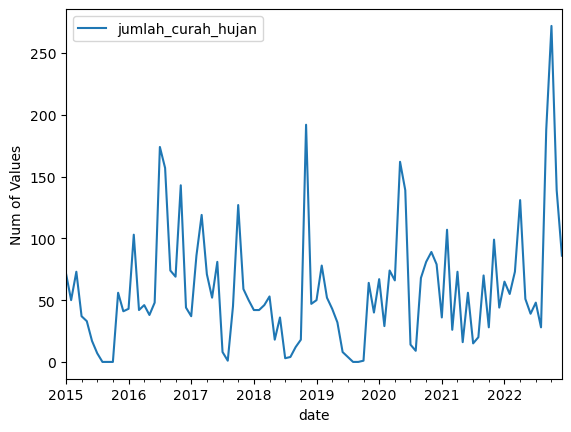

In [45]:
# Plot the data

df1.columns = ['date', 'jumlah_curah_hujan']
df1.date = pd.to_datetime(df1.date)
df1.set_index('date',inplace=True)
df1.plot()
plt.xlabel('date')
plt.ylabel('Num of Values')

In [46]:
df1

,jumlah_curah_hujan
date,
2015-01-01,72.0
2015-02-01,50.0
2015-03-01,73.0
2015-04-01,37.0
2015-05-01,33.0
...,...
2022-08-01,28.0
2022-09-01,188.0
2022-10-01,272.0


# Check Stationarity

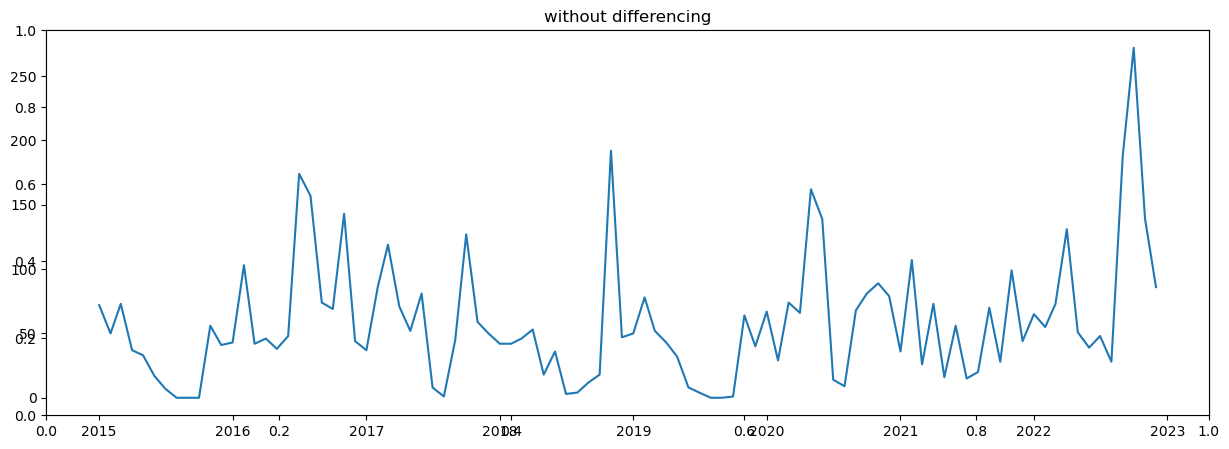

In [47]:
# Plot without differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('without differencing')
ax1.plot(df1['jumlah_curah_hujan'])

In [48]:
# Create a function to check stationarity

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [49]:
# Check stationarity of the dataset

check_stationarity(df1['jumlah_curah_hujan'])

ADF Statistic: -6.256596
p-value: 0.000000
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583
Stationary


# Modeling

In [51]:
# Splitting dataset

train = df1[:48]
test = df1[48:]

print('Train size : ', train.shape)
print('Test size : ', test.shape)

Train size :  (48, 1)
Test size :  (48, 1)


In [52]:
# Stationarity check

check_stationarity(train['jumlah_curah_hujan'])

ADF Statistic: -4.839571
p-value: 0.000046
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Stationary


In [53]:
# Stationarity check

check_stationarity(test['jumlah_curah_hujan'])

ADF Statistic: -4.047895
p-value: 0.001179
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Stationary


# **Naive Approach**

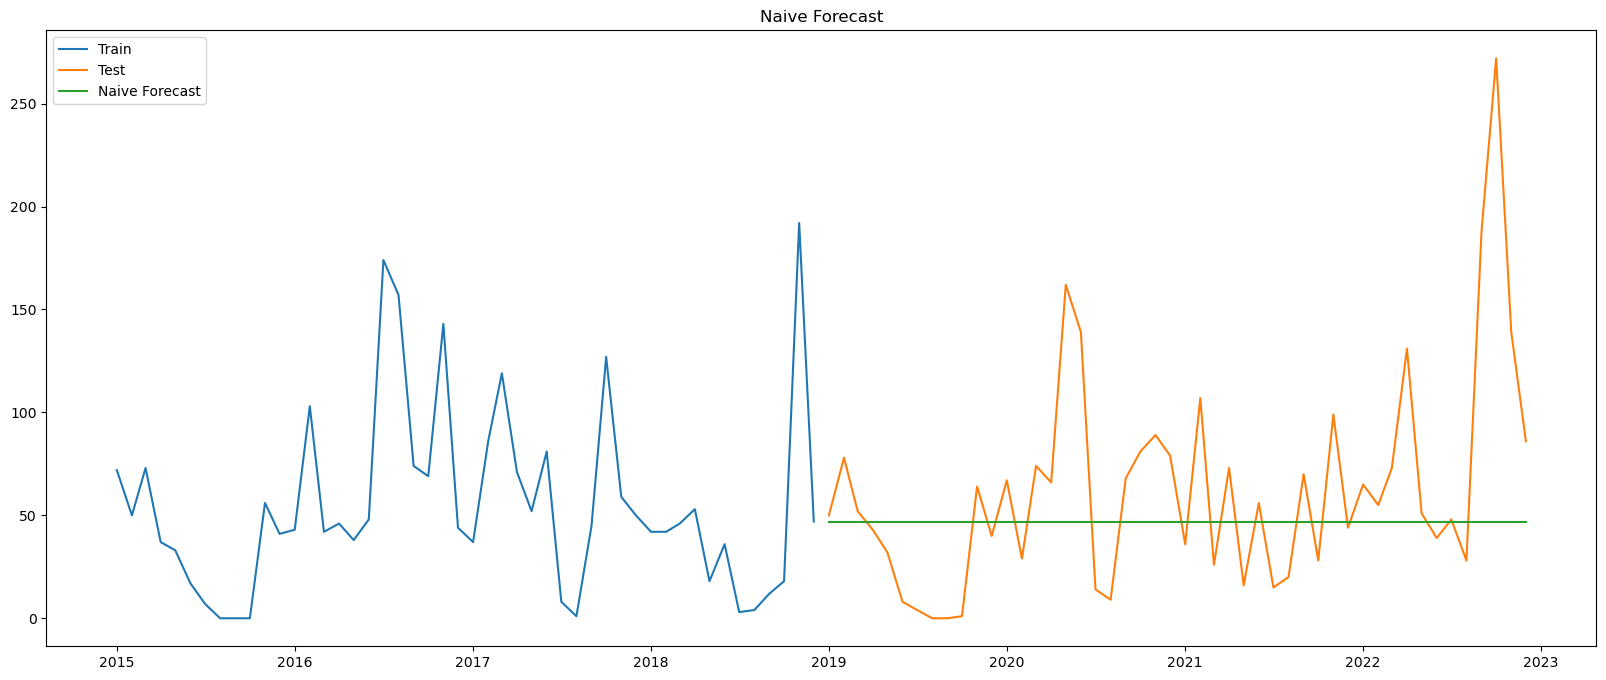

In [54]:
dd= np.asarray(train.jumlah_curah_hujan)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(20,8))
plt.plot(train.index, train['jumlah_curah_hujan'], label='Train')
plt.plot(test.index,test['jumlah_curah_hujan'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rmse = sqrt(mean_squared_error(test.jumlah_curah_hujan, y_hat.naive))
mae = mean_absolute_error(test.jumlah_curah_hujan, y_hat.naive)

print("mae :",mae)
print("rmse :",rmse)

mae : 36.958333333333336
rmse : 54.42655601817921


# **Simple Average**

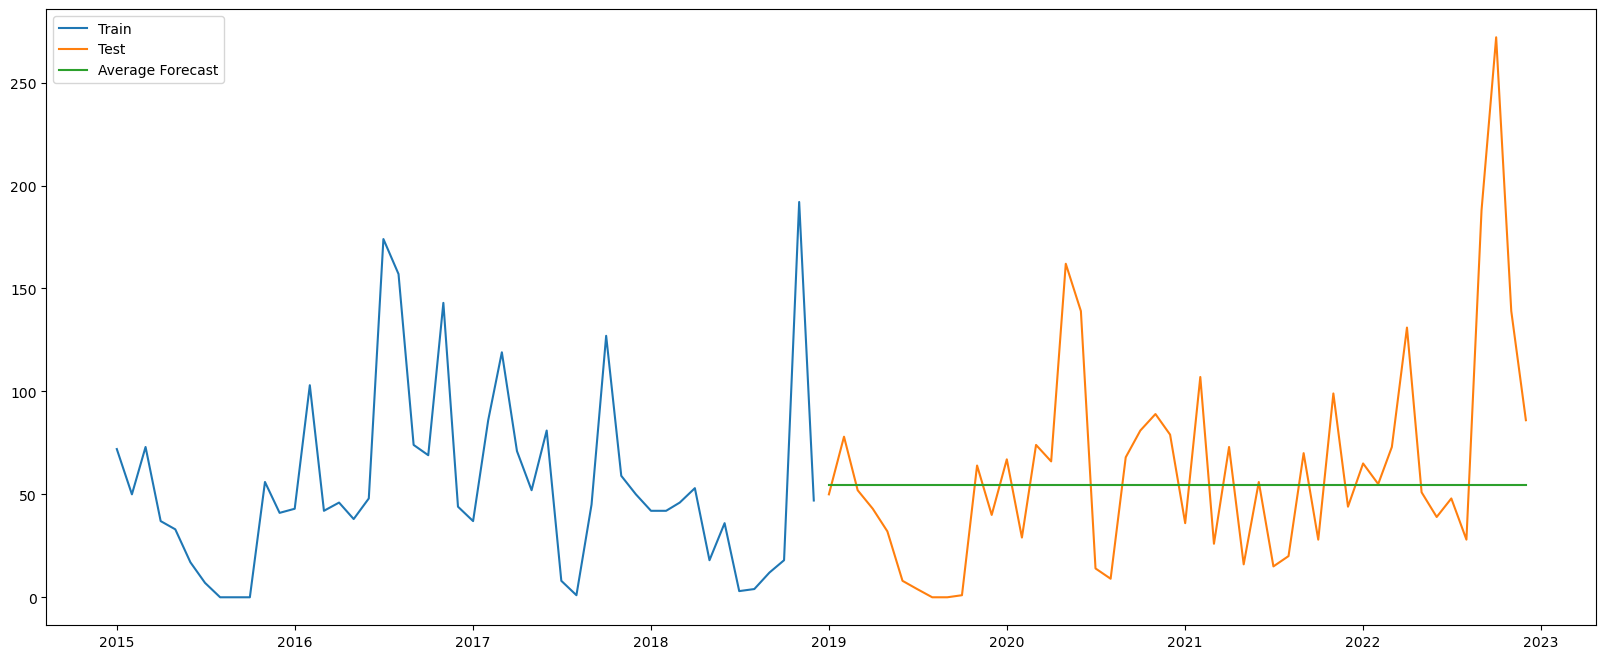

In [56]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['jumlah_curah_hujan'].mean()
plt.figure(figsize=(20,8))
plt.plot(train['jumlah_curah_hujan'], label='Train')
plt.plot(test['jumlah_curah_hujan'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [57]:
print("mae :", mean_absolute_error(test.jumlah_curah_hujan, y_hat_avg.avg_forecast))
print("rmse :", sqrt(mean_squared_error(test.jumlah_curah_hujan, y_hat_avg.avg_forecast)))

mae : 36.416666666666664
rmse : 52.741112995461144


# **Moving Average**

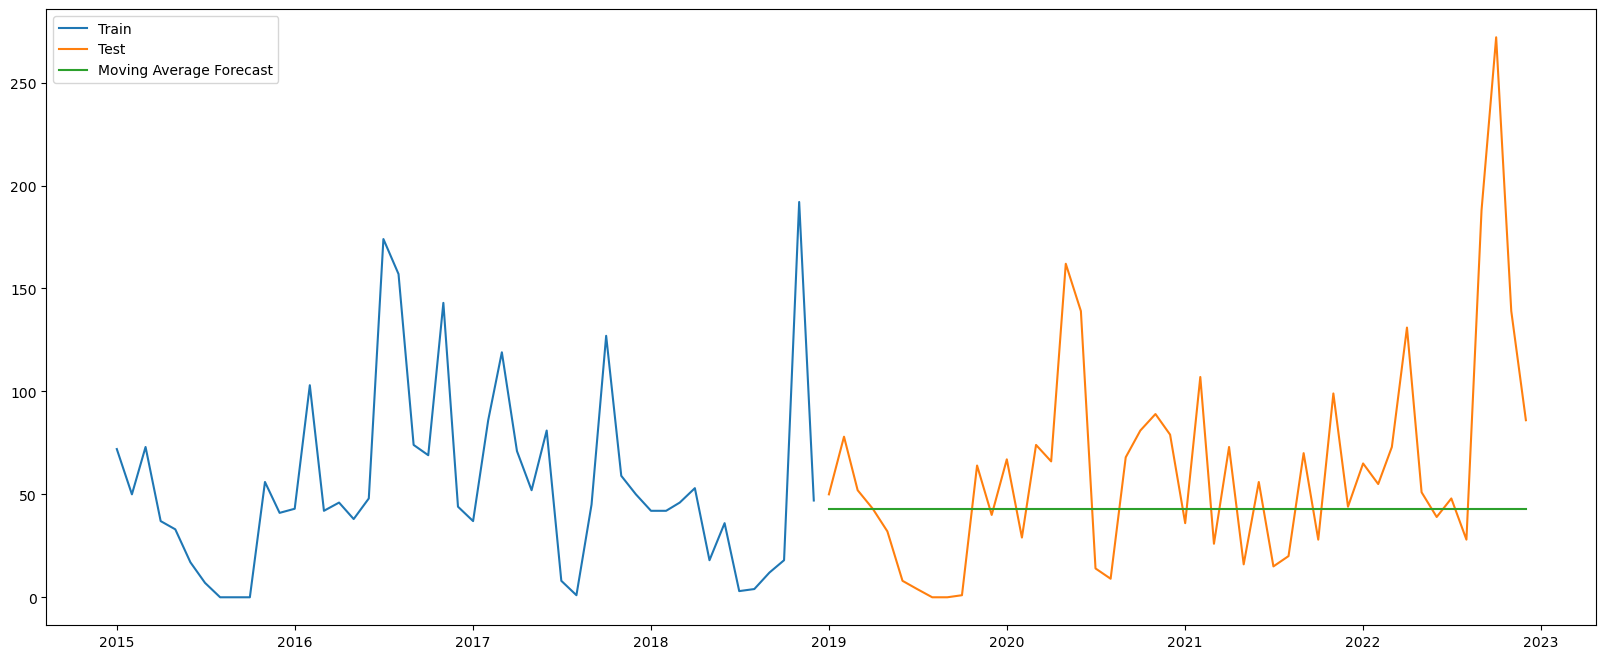

In [58]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['jumlah_curah_hujan'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(20,8))
plt.plot(train['jumlah_curah_hujan'], label='Train')
plt.plot(test['jumlah_curah_hujan'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [59]:
print("mae :", mean_absolute_error(test.jumlah_curah_hujan, y_hat_avg.moving_avg_forecast))
print("rmse :", sqrt(mean_squared_error(test.jumlah_curah_hujan, y_hat_avg.moving_avg_forecast)))

mae : 37.729166666666664
rmse : 55.80807886557883


# **SES**

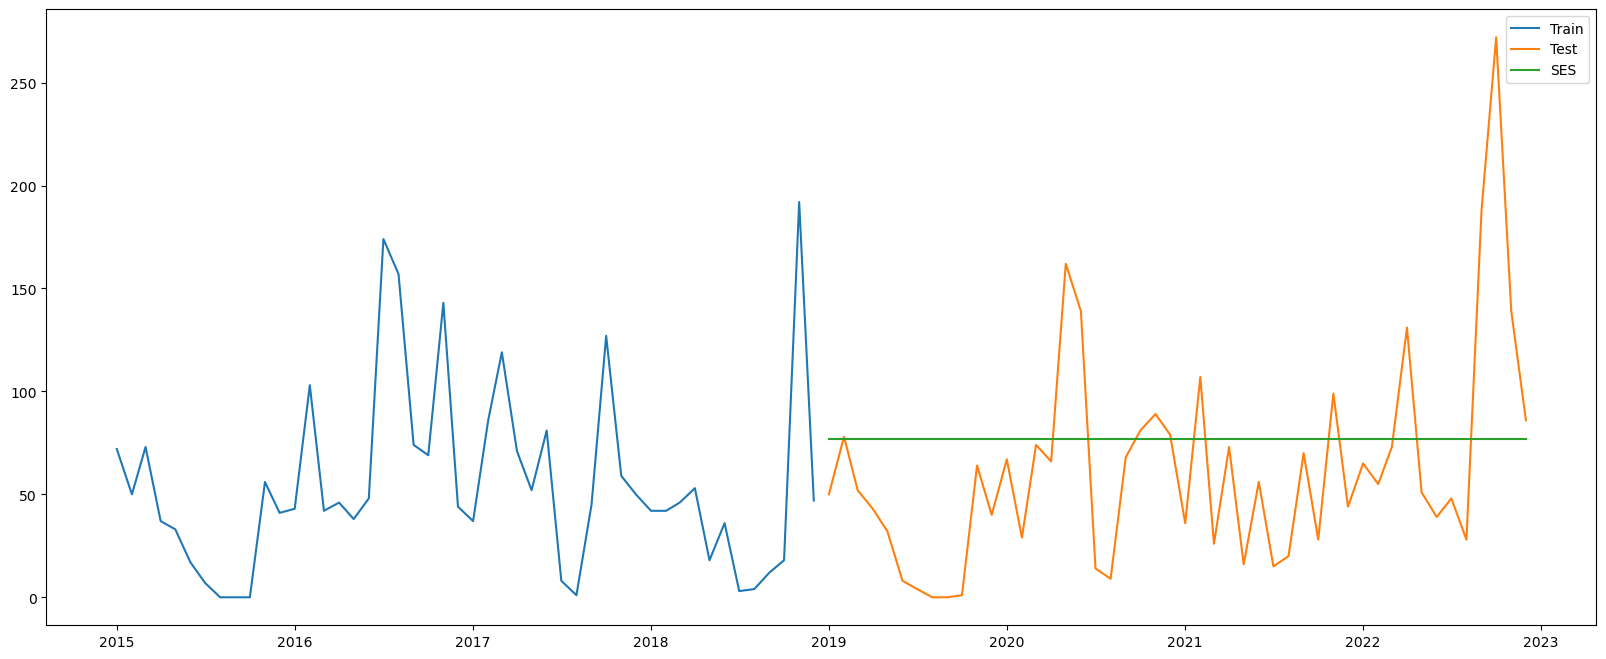

In [60]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['jumlah_curah_hujan'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot(train['jumlah_curah_hujan'], label='Train')
plt.plot(test['jumlah_curah_hujan'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [61]:
print("mae :", mean_absolute_error(test.jumlah_curah_hujan, y_hat_avg.SES))
print("rmse :", sqrt(mean_squared_error(test.jumlah_curah_hujan, y_hat_avg.SES)))

mae : 41.10681480058489
rmse : 53.90705068857062


# **Holt-Winters**

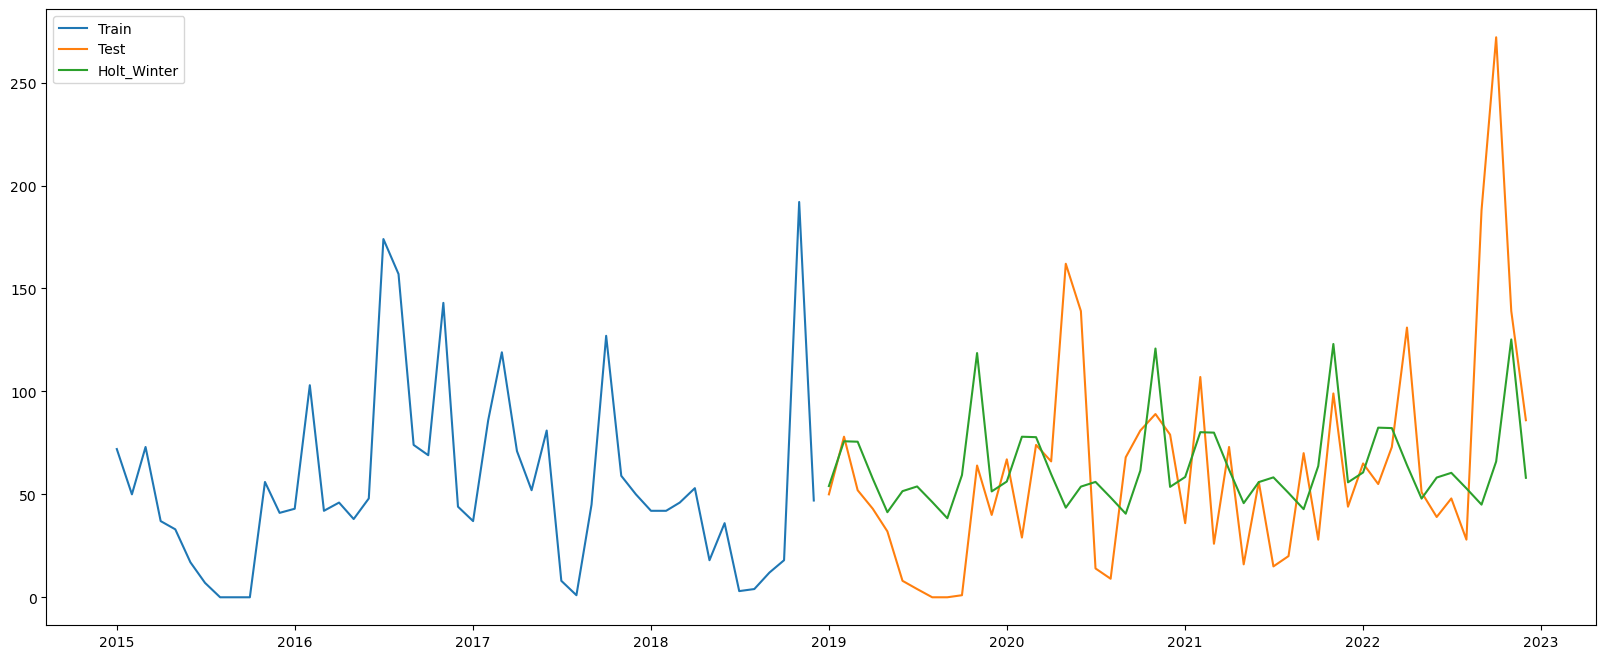

In [69]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['jumlah_curah_hujan']) ,seasonal_periods=12 ,trend='Add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot( train['jumlah_curah_hujan'], label='Train')
plt.plot(test['jumlah_curah_hujan'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [70]:
print("mae :", mean_absolute_error(test.jumlah_curah_hujan, y_hat_avg.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test.jumlah_curah_hujan, y_hat_avg.Holt_Winter)))

mae : 35.20669893870317
rmse : 51.315250778824726


# With Differensial

In [73]:
# Check stationarity of the dataset

check_stationarity(df1['jumlah_curah_hujan'].diff().dropna())

ADF Statistic: -7.716034
p-value: 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Stationary


In [79]:
# Perform first-order differencing

diff1 = df1['jumlah_curah_hujan'].diff().dropna()
diff1 = pd.DataFrame(diff1)
diff1

,jumlah_curah_hujan
date,
2015-02-01,-22.0
2015-03-01,23.0
2015-04-01,-36.0
2015-05-01,-4.0
2015-06-01,-16.0
...,...
2022-08-01,-20.0
2022-09-01,160.0
2022-10-01,84.0


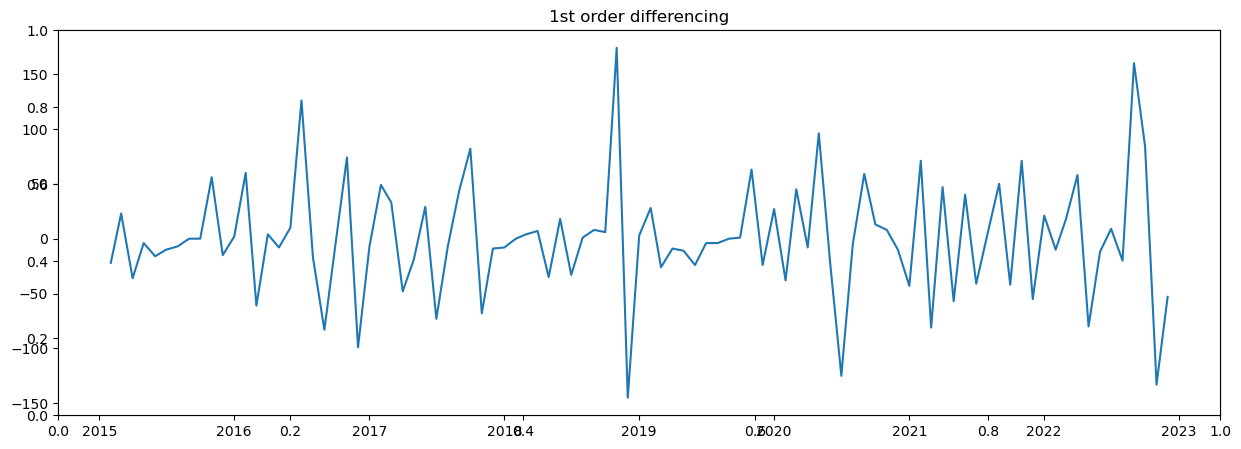

In [80]:
# Plot the result after first-order differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('1st order differencing')
ax1.plot(diff1)

# Modeling after Diff

In [82]:
# Splitting dataset

train1 = diff1[:48]
test1 = diff1[48:]

print('Train size : ', train.shape)
print('Test size : ', test.shape)

Train size :  (48, 1)
Test size :  (47, 1)


In [83]:
# Stationarity check

check_stationarity(train1['jumlah_curah_hujan'])

ADF Statistic: -7.730552
p-value: 0.000000
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Stationary


In [84]:
# Stationarity check

check_stationarity(test1['jumlah_curah_hujan'])

ADF Statistic: -6.204336
p-value: 0.000000
Critical Values:
	1%: -3.593
	5%: -2.932
	10%: -2.604
Stationary


# **Naive Approach Diff** 

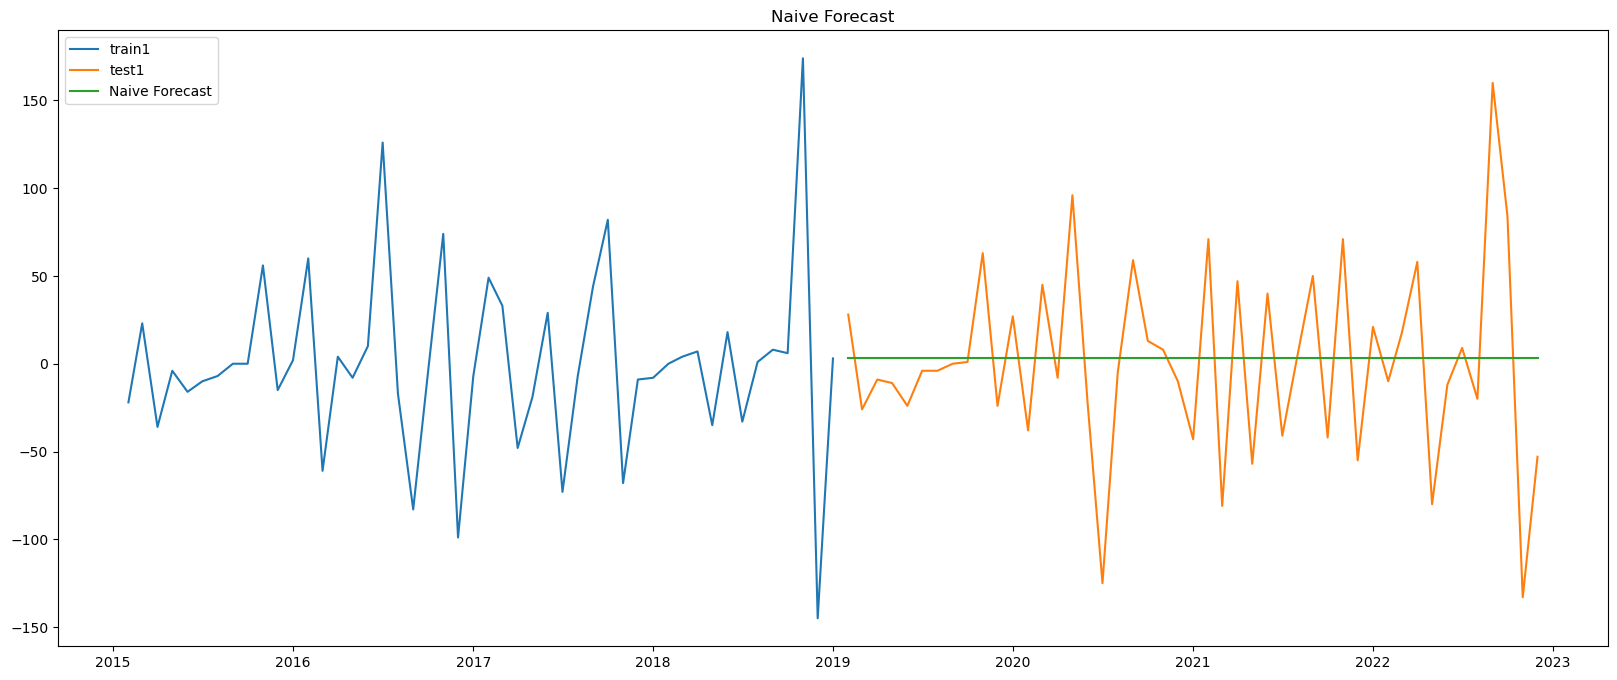

In [85]:
dd= np.asarray(train1.jumlah_curah_hujan)
y_hat = test1.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(20,8))
plt.plot(train1.index, train1['jumlah_curah_hujan'], label='train1')
plt.plot(test1.index,test1['jumlah_curah_hujan'], label='test1')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rmse = sqrt(mean_squared_error(test1.jumlah_curah_hujan, y_hat.naive))
mae = mean_absolute_error(test1.jumlah_curah_hujan, y_hat.naive)

print("mae :",mae)
print("rmse :",rmse)

mae : 41.08510638297872
rmse : 54.46978471417443


# **Simple Average Diff**

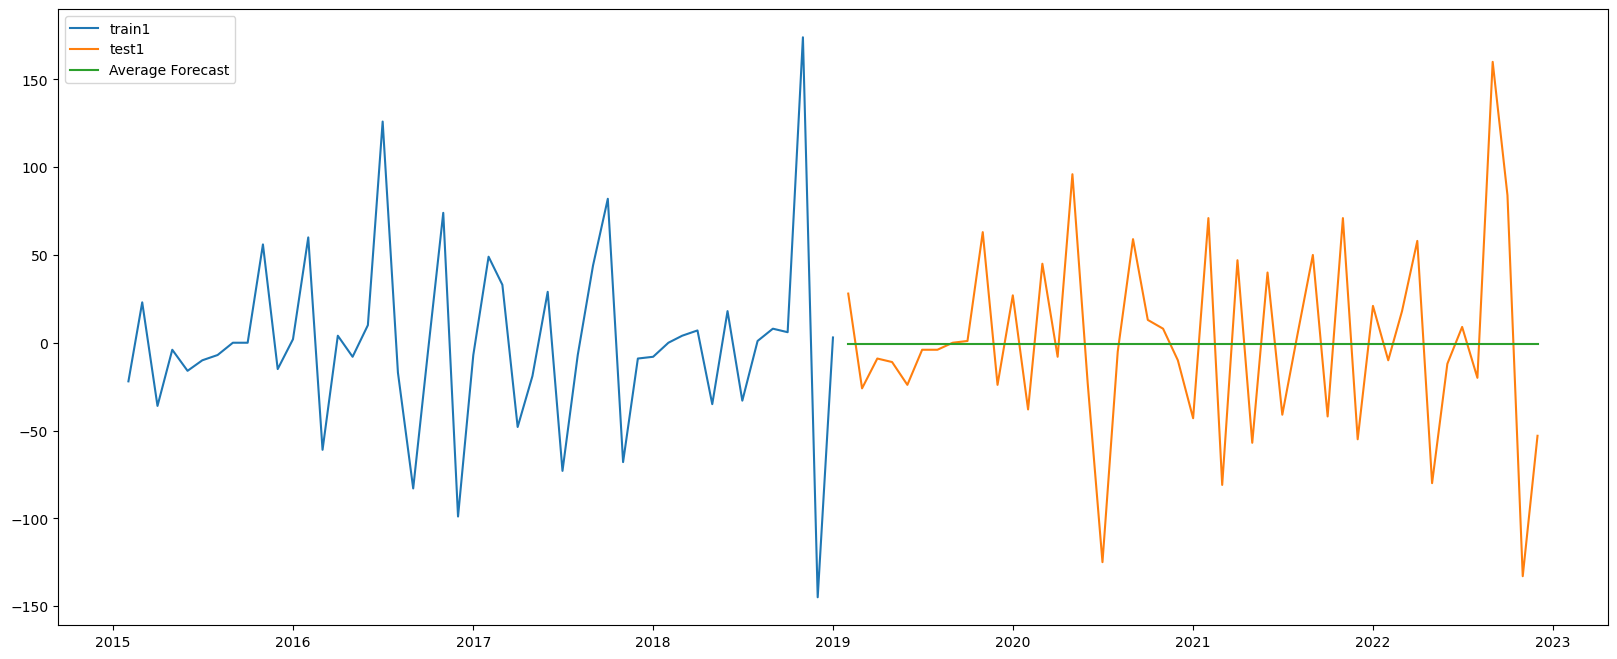

In [87]:
y_hat_avg = test1.copy()
y_hat_avg['avg_forecast'] = train1['jumlah_curah_hujan'].mean()
plt.figure(figsize=(20,8))
plt.plot(train1['jumlah_curah_hujan'], label='train1')
plt.plot(test1['jumlah_curah_hujan'], label='test1')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [88]:
print("mae :", mean_absolute_error(test1.jumlah_curah_hujan, y_hat_avg.avg_forecast))
print("rmse :", sqrt(mean_squared_error(test1.jumlah_curah_hujan, y_hat_avg.avg_forecast)))

mae : 40.651595744680854
rmse : 54.43772027366117


# **Holt-Winters Diff**

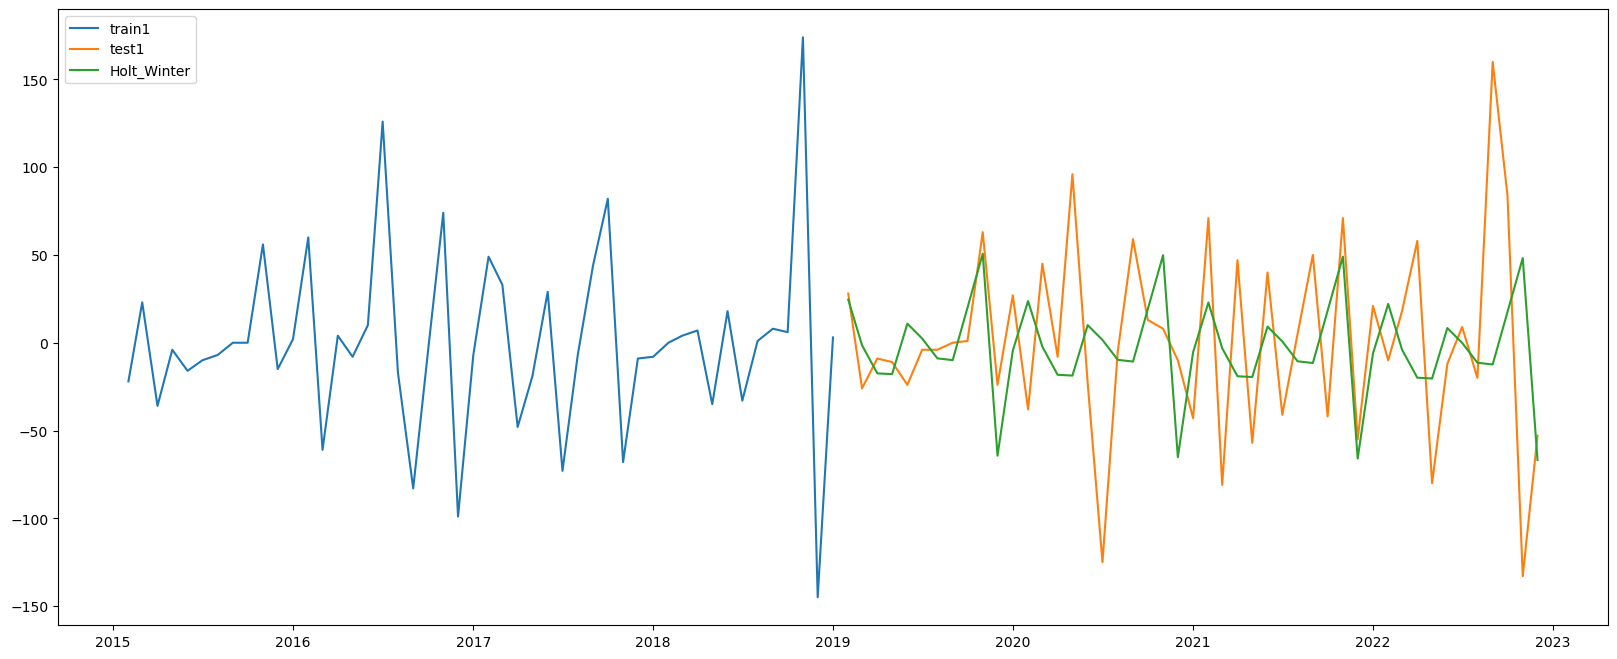

In [93]:
y_hat_avg = test1.copy()
fit1 = ExponentialSmoothing(np.asarray(train1['jumlah_curah_hujan']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test1))
plt.figure(figsize=(20,8))
plt.plot( train1['jumlah_curah_hujan'], label='train1')
plt.plot(test1['jumlah_curah_hujan'], label='test1')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [91]:
print("mae :", mean_absolute_error(test1.jumlah_curah_hujan, y_hat_avg.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test1.jumlah_curah_hujan, y_hat_avg.Holt_Winter)))

mae : 42.013049875045624
rmse : 57.8966938161268
